In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets
X, y = datasets.make_moons(noise=0.3, n_samples=500, random_state=666)

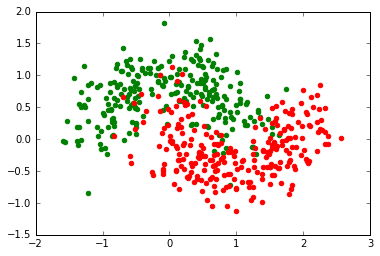

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color='g')
plt.scatter(X[y==1,0], X[y==1,1], color='r')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.872

In [8]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.896

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.848

In [11]:
y_predict1 = log_reg.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

In [12]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

In [13]:
y_predict[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.888

## 使用sklearn封装的集成学习

In [15]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
        ('log_reg', LogisticRegression()),
        ('svm_clf', SVC()),
        ('dt_clf', DecisionTreeClassifier())
    ], voting='hard')

In [16]:
voting_clf.fit(X_test, y_test)

VotingClassifier(estimators=[('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svm_clf...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [17]:
voting_clf.score(X_test, y_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.88

## soft voting

In [18]:
voting_clf = VotingClassifier(estimators=[
        ('log_reg', LogisticRegression()),
        ('svm_clf', SVC(probability=True)),#需要设置一个参数才能得到概率
        ('dt_clf', DecisionTreeClassifier(random_state=666))
    ], voting='soft')

In [19]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.896

## 使用bagging

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(), 
                               n_estimators=500, max_samples=100,#500个子模型，每个看100个数据
                               bootstrap=True)#放回取样

In [21]:
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.88

In [22]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), 
                               n_estimators=5000, max_samples=100,#500个子模型，每个看100个数据
                               bootstrap=True)#放回取样
bagging_clf2.fit(X_train, y_train)
bagging_clf2.score(X_test, y_test)

0.88

## OOB (Out-of-Bag)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(), 
                               n_estimators=500, max_samples=100,#500个子模型，每个看100个数据
                               bootstrap=True, oob_score=True)#放回取样
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [24]:
bagging_clf.oob_score_

0.904

## n_jobs

In [25]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), 
                               n_estimators=500, max_samples=100,#500个子模型，每个看100个数据
                               bootstrap=True, oob_score=True)#放回取样
bagging_clf.fit(X, y)

Wall time: 657 ms


In [26]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), 
                               n_estimators=500, max_samples=100,#500个子模型，每个看100个数据
                               bootstrap=True, oob_score=True, n_jobs=-1)#放回取样
bagging_clf.fit(X, y)

Wall time: 5.94 s


## bootstrap_features 对特征采样

In [31]:
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(), 
                               n_estimators=500, max_samples=500,#500个子模型，每个看100个数据
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)#放回取样
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.83

In [32]:
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(), 
                               n_estimators=500, max_samples=100,#500个子模型，每个看100个数据
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)#放回取样
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.874

# 随机森林

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, random_state=666, oob_score=True)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=666, verbose=0, warm_start=False)

In [34]:
rf_clf.oob_score_

0.892

In [35]:
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=666, oob_score=True)
rf_clf.fit(X, y)
rf_clf.oob_score_

0.906

## Extra-Tree 随机维度、随机阈值进行划分

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=666)
et_clf.fit(X, y)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=666, verbose=0, warm_start=False)

In [37]:
et_clf.oob_score_

0.892

## 集成学习解决回归问题

In [38]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Boosting

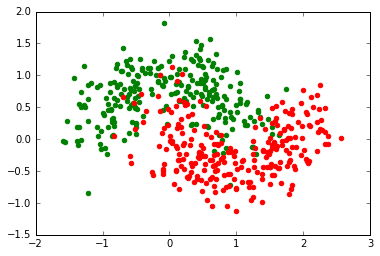

In [39]:
plt.scatter(X[y==0,0], X[y==0,1], color='g')
plt.scatter(X[y==1,0], X[y==1,1], color='r')

## AdaBoosting

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=500, random_state=None)

In [41]:
ada_clf.score(X_test, y_test)

0.856

## Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [43]:
gb_clf.score(X_test, y_test)

0.904

# Stacking

In [ ]:
#sklearn 中没有提供接口